Point mutatnt analysis. 

EnvZ in an inner membrane of WT E.coli. 

GWB 

Jan 2023. 

In [1]:
! cd /home/george/Desktop/*23/namd

In [2]:
import MDAnalysis as mda

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
#import matplotlib as plot

In [6]:
import mdtraj as md

In [7]:
! sed -e 's/HSD/HIS/' step5_input.pdb >> chap.pdb             #CHARMM_GUI and ChAP have different nomenclatures of naming some residues. This is the only AA name clash i've found so far. 

In [8]:
#! chap -f chap.pdb -s chap.pdb -sel-pathway protein           #-sel-pathway does not have to be specified. If you don't, ChAP will give you options to choose from.

In [9]:
! mdconvert step7_production.dcd -o step7_production.trr

converted 175 frames, 405234 atoms 


In [10]:
! pwd

/home/george/Desktop


In [11]:
! gmx trjconv -f step7_production.trr > chap.xtc

                     :-) GROMACS - gmx trjconv, 2018.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS de

In [12]:
! chap -f trajout.xtc -s chap.pdb -sel-pathway protein


		 CCCCCC  HH     HH    AAA    PPPPPPPP  
		CC    CC HH     HH   AA AA   PP     PP 
		CC       HH     HH  AA   AA  PP     PP 
		CC       HHHHHHHHH AA     AA PPPPPPPP  
		CC       HH     HH AAAAAAAAA PP        
		CC    CC HH     HH AA     AA PP        
 		 CCCCCC  HH     HH AA     AA PP        

             The Channel Annotation Package, version 0.9.1


         based on residue and atom names, since they could not be
         definitively assigned from the information in your input
         files. These guessed numbers might deviate from the mass
         and radius of the atom type. Please check the output
         files if necessary.


Reading frame     170 time  170.000   
Analyzed 175 frames, last time 174.000

Forming time averages, 100% completeee


Thank you for using CHAP - The Channel Annotation Package! 



In [13]:
#May need these! I din't realise I needed them at the time

#! conda install nglview -c conda-forge && y
#wait
#conda install -c ambermd pytraj


In [14]:
#import pytraj as pt
import nglview as nv
import json

In [15]:
#nv ('step5_input.pdb')

In [16]:
import json
with open("output.json") as data_file:
    data = json.load(data_file)
#data.keys()

In [17]:
from matplotlib import pyplot as pl
%matplotlib inline
pl.rcParams['figure.dpi'] = 450
pl.rcParams['savefig.dpi'] = 450

In [18]:
pl.figure("radius_profile")

<Figure size 2700x1800 with 0 Axes>

<Figure size 2700x1800 with 0 Axes>

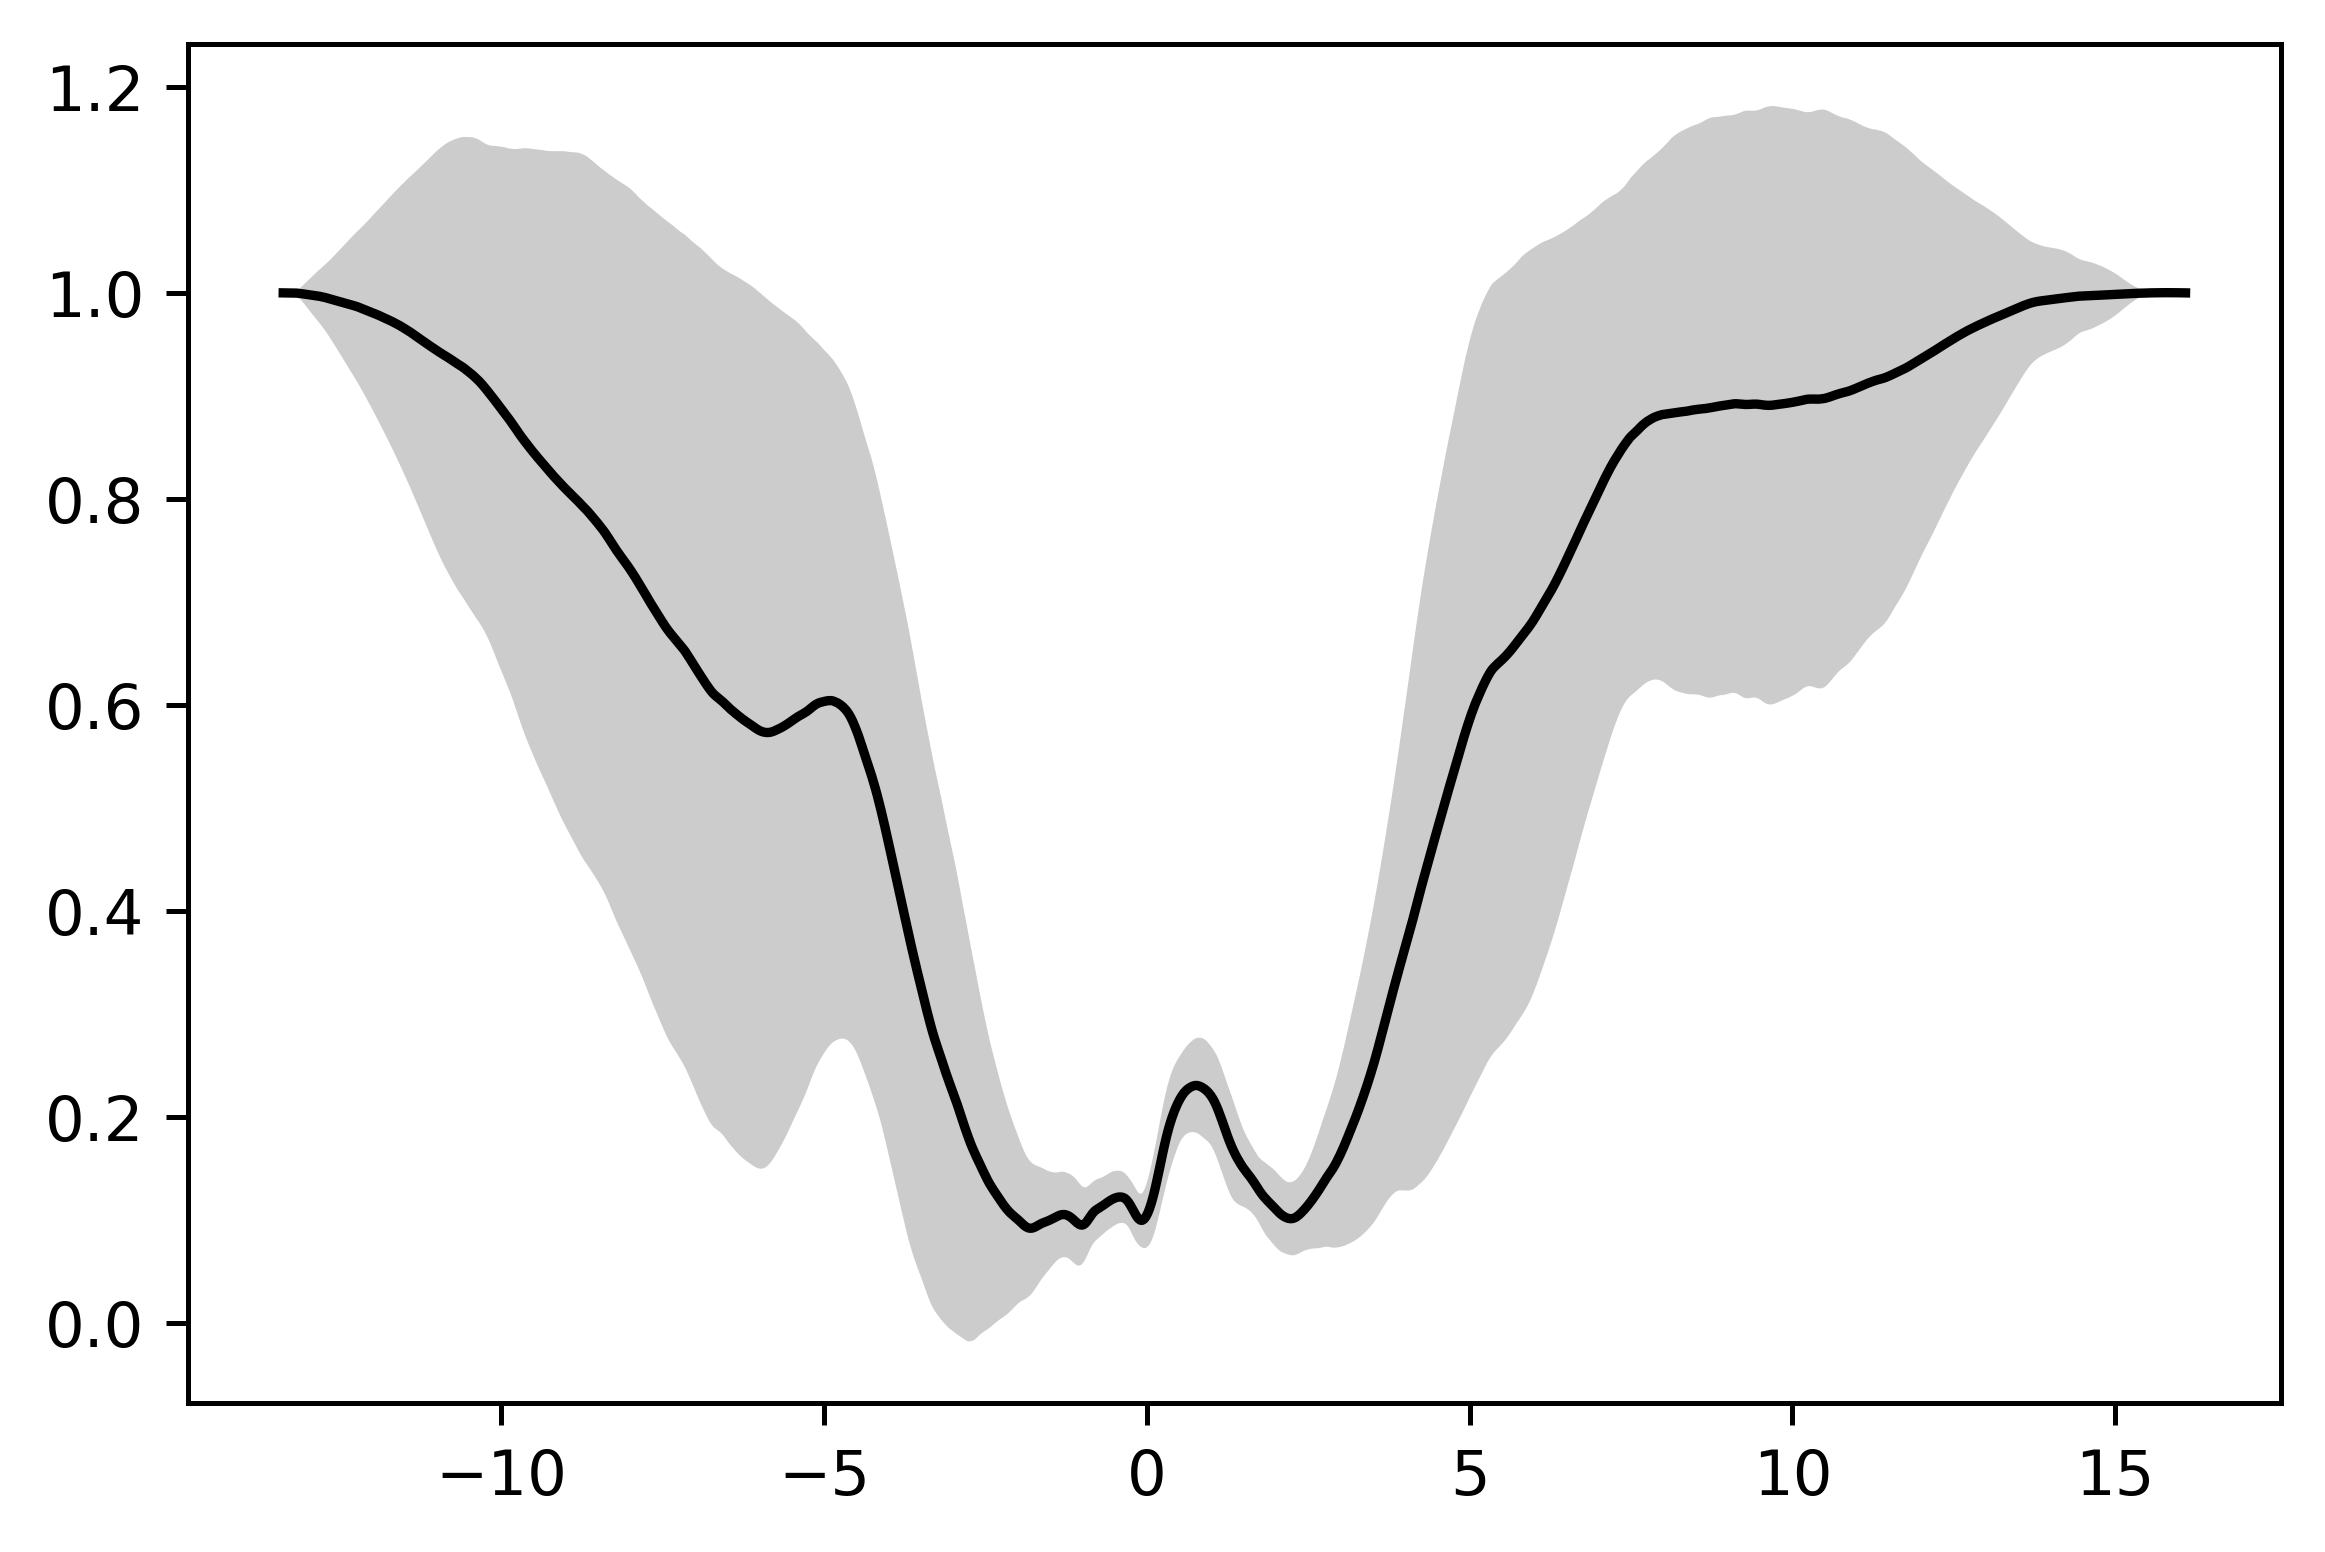

In [19]:
pl.plot(                                                                        
    np.array(data["pathwayProfile"]["s"]),                                      
    np.array(data["pathwayProfile"]["radiusMean"]),                             
   "k-")  
radius_sd = np.array(data["pathwayProfile"]["radiusSd"])
pl.fill_between(
	np.array(data["pathwayProfile"]["s"]),
	np.array(data["pathwayProfile"]["radiusMean"]) - radius_sd,
    np.array(data["pathwayProfile"]["radiusMean"]) + radius_sd,
	facecolor = "#000000",
	alpha = 0.2)
              


In [20]:
pl.savefig("radius_profile.png")

<Figure size 2700x1800 with 0 Axes>

In [21]:
pl.close("radius_profile")

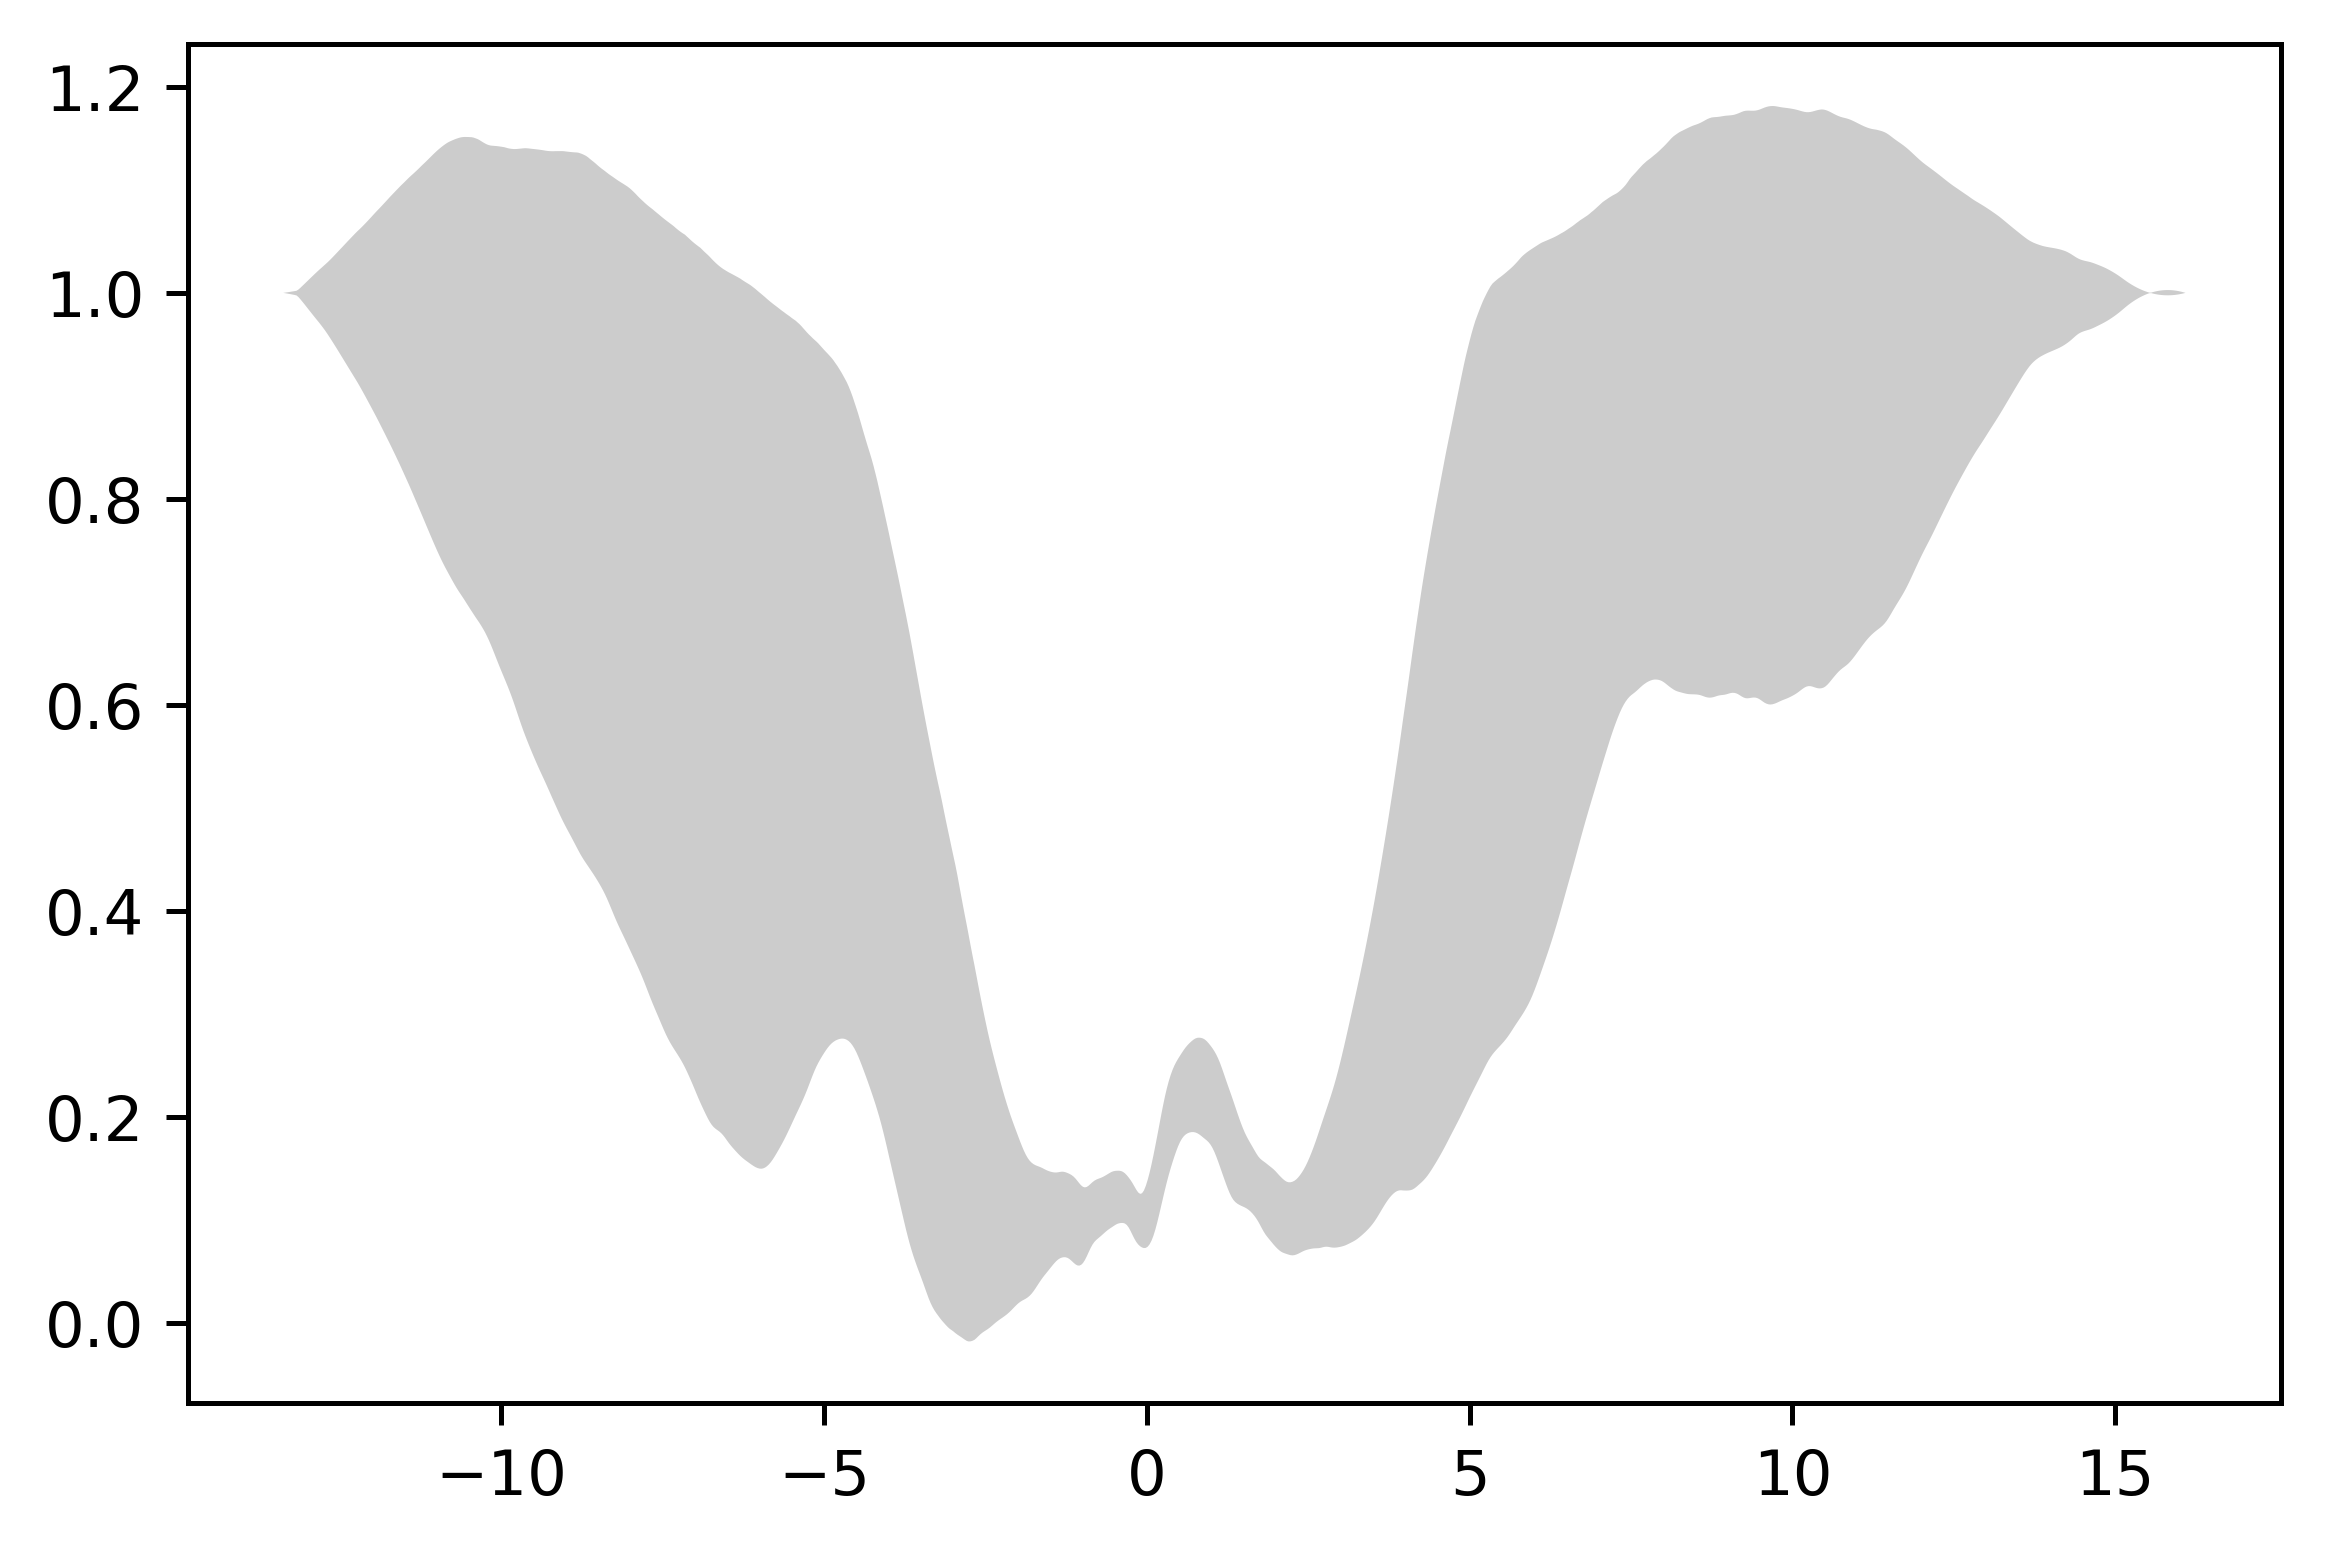

In [22]:
radius_sd = np.array(data["pathwayProfile"]["radiusSd"])
pl.fill_between(
	np.array(data["pathwayProfile"]["s"]),
	np.array(data["pathwayProfile"]["radiusMean"]) - radius_sd,
    np.array(data["pathwayProfile"]["radiusMean"]) + radius_sd,
	facecolor = "#000000",
	alpha = 0.2)

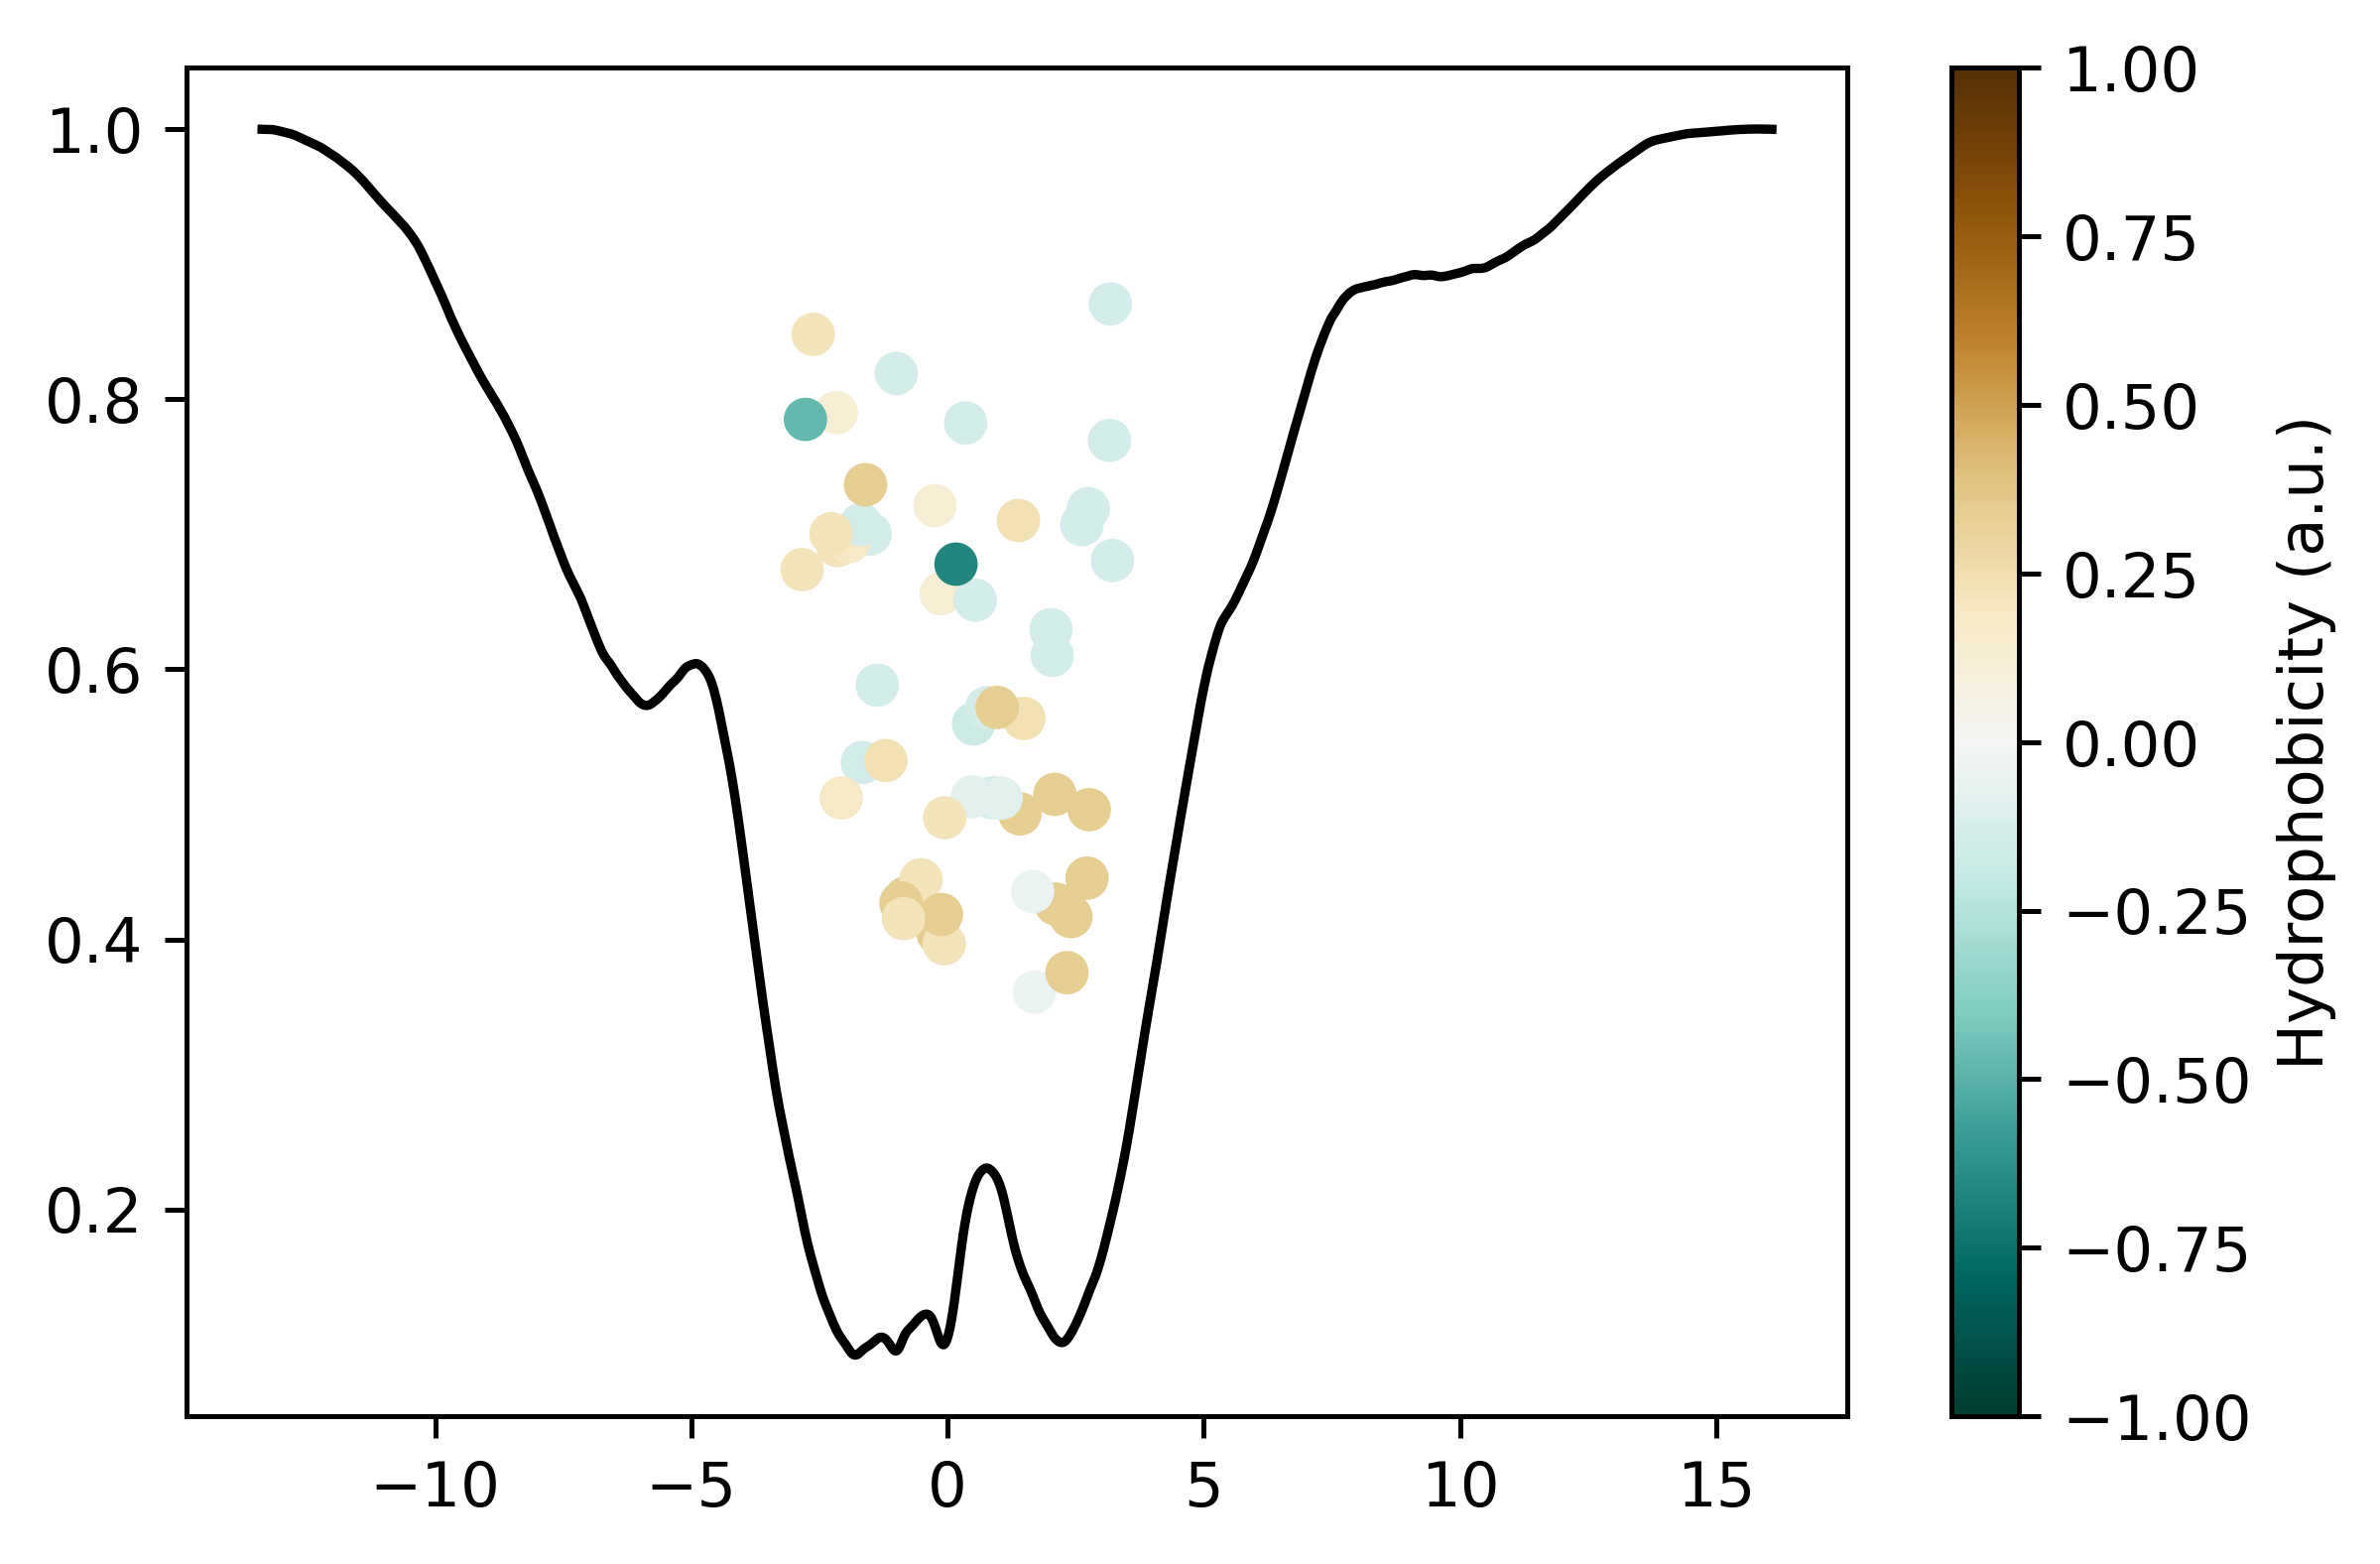

In [23]:
pf = np.array(data["residueSummary"]["poreFacing"]["mean"]) > 0.5 
pl.scatter(                                                                     
    np.array(data["residueSummary"]["s"]["mean"])[pf],                          
    np.array(data["residueSummary"]["rho"]["mean"])[pf],                        
    c = np.array(data["residueSummary"]["hydrophobicity"])[pf],                 
    marker = "o",                                                               
    cmap = "BrBG_r")                                                            
pl.clim(                                                                        
    -max(abs(np.array(data["residueSummary"]["hydrophobicity"]))),              
    max(abs(np.array(data["residueSummary"]["hydrophobicity"]))))               
cbar = pl.colorbar()                                                            
cbar.ax.set_ylabel("Hydrophobicity (a.u.)")
#pl.fill_between(
 #   np.array(data["pathwayProfile"]["s"]),                                      
  #  np.array(data["pathwayProfile"]["radiusMean"]) - radius_sd,                 
   # np.array(data["pathwayProfile"]["radiusMean"]) + radius_sd,                 
    #facecolor = "#000000",                                                      
   # alpha = 0.2)
pl.plot(                                                                        
   np.array(data["pathwayProfile"]["s"]),                                      
    np.array(data["pathwayProfile"]["radiusMean"]),                             
   "k-")

Text(0, 0.5, 'Hydrophobicity (a.u.)')

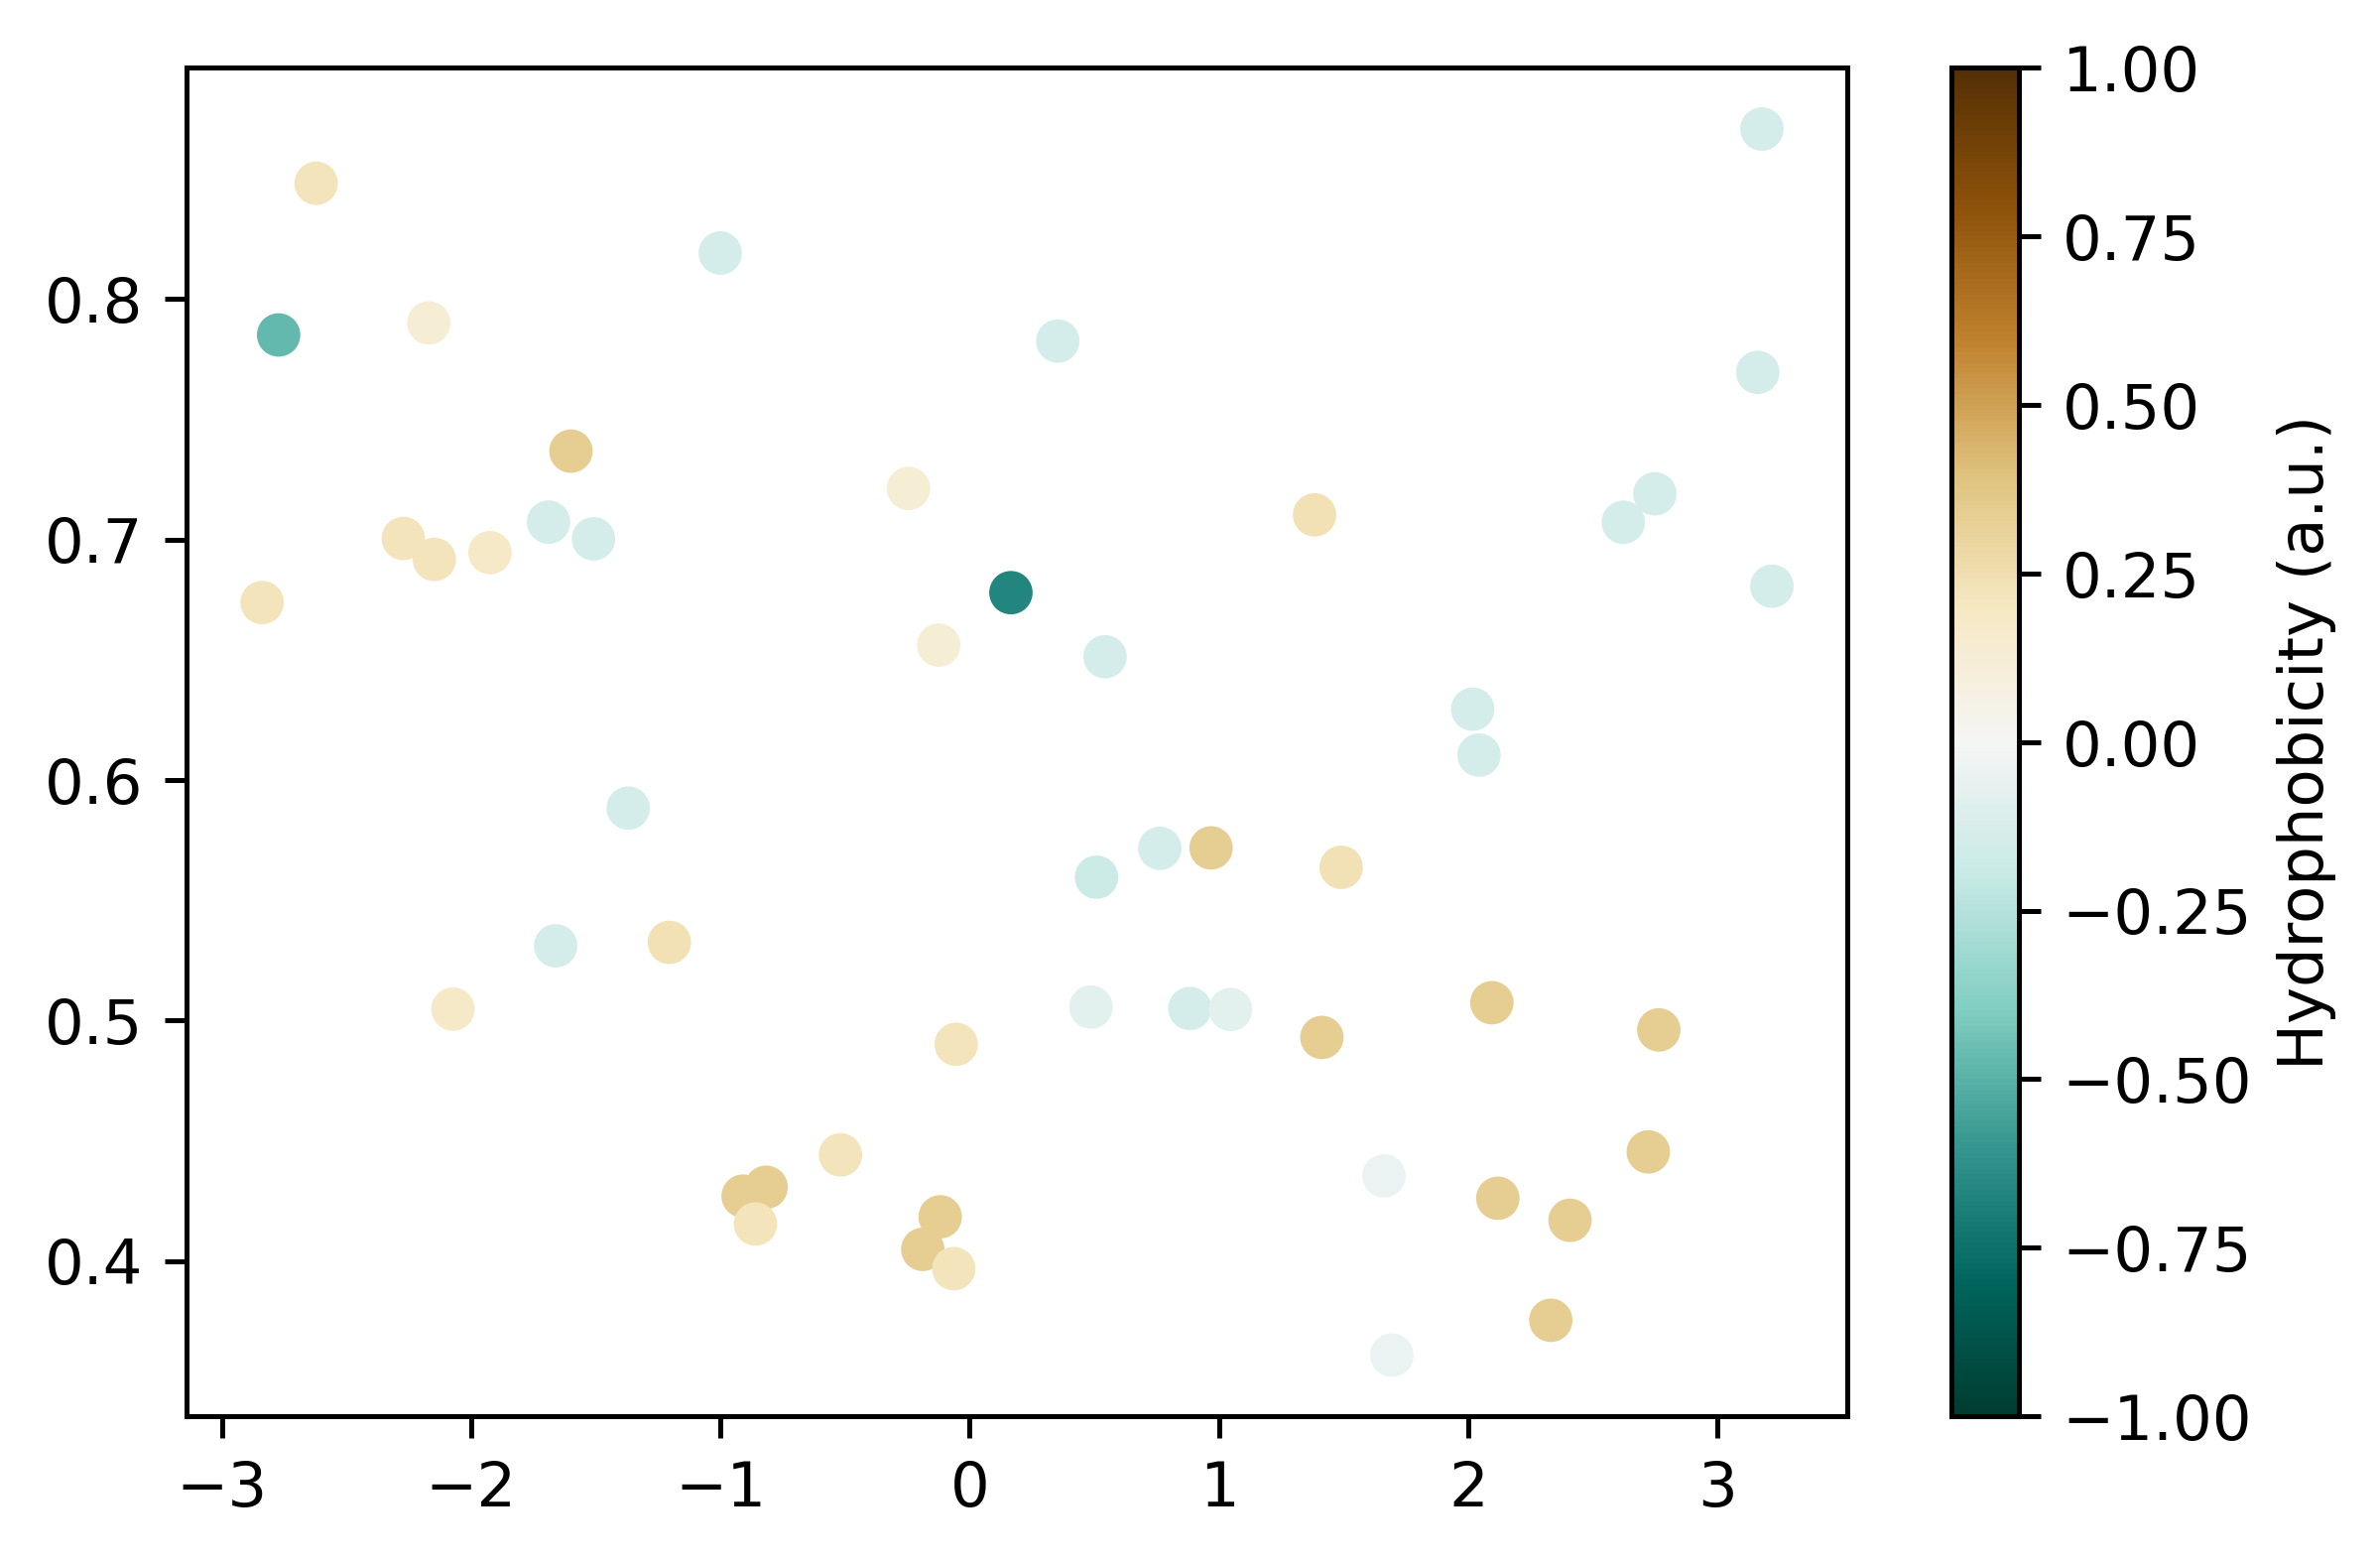

In [24]:
pf = np.array(data["residueSummary"]["poreFacing"]["mean"]) > 0.5 
pl.scatter(                                                                     
    np.array(data["residueSummary"]["s"]["mean"])[pf],                          
    np.array(data["residueSummary"]["rho"]["mean"])[pf],                        
    c = np.array(data["residueSummary"]["hydrophobicity"])[pf],                 
    marker = "o",                                                               
    cmap = "BrBG_r")                                                            
pl.clim(                                                                        
    -max(abs(np.array(data["residueSummary"]["hydrophobicity"]))),              
    max(abs(np.array(data["residueSummary"]["hydrophobicity"]))))               
cbar = pl.colorbar()                                                            
cbar.ax.set_ylabel("Hydrophobicity (a.u.)")

In [25]:
from matplotlib import pyplot as pl
%matplotlib inline
import argparse

In [26]:
parser = argparse.ArgumentParser()
parser.add_argument(
    "-filename",
    nargs = "?",
    const = "output.json",
    default = "output.json")
parser.add_argument("-dpi",
    nargs = "?",
    const = 1200,
    default = 1200,
    type = int)
args = parser.parse_args()

In [27]:
import json
with open('output.json') as data_file:
    data = json.load(data_file)

Text(0, 0.5, 'R (nm)')

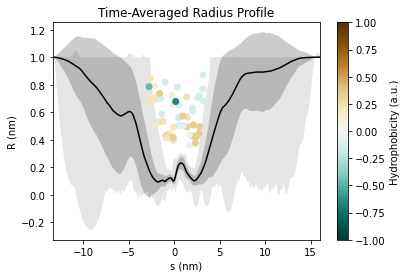

In [28]:
pl.figure("radius_profile")

pl.plot(
	np.array(data["pathwayProfile"]["s"]),
    np.array(data["pathwayProfile"]["radiusMean"]),
	"k-")

pl.fill_between(
	np.array(data["pathwayProfile"]["s"]),
	np.array(data["pathwayProfile"]["radiusMin"]),
	np.array(data["pathwayProfile"]["radiusMax"]),
	facecolor = "#000000",
	alpha = 0.1)

radius_sd = np.array(data["pathwayProfile"]["radiusSd"])
pl.fill_between(
	np.array(data["pathwayProfile"]["s"]),
	np.array(data["pathwayProfile"]["radiusMean"]) - radius_sd,
    np.array(data["pathwayProfile"]["radiusMean"]) + radius_sd,
	facecolor = "#000000",
	alpha = 0.2)

pf = np.array(data["residueSummary"]["poreFacing"]["mean"]) > 0.5
pl.scatter(
	np.array(data["residueSummary"]["s"]["mean"])[pf],
	np.array(data["residueSummary"]["rho"]["mean"])[pf],
    c =	np.array(data["residueSummary"]["hydrophobicity"])[pf],
    marker = "o",
    cmap = "BrBG_r")
pl.clim(
    -max(abs(np.array(data["residueSummary"]["hydrophobicity"]))),
    max(abs(np.array(data["residueSummary"]["hydrophobicity"]))))
cbar = pl.colorbar()
cbar.ax.set_ylabel("Hydrophobicity (a.u.)")

pl.margins(x = 0)
pl.title("Time-Averaged Radius Profile")
pl.xlabel("s (nm)")
pl.ylabel("R (nm)")

#pl.savefig(
    #"time_averaged_radius_profile.png",
	#dpi = args.dpi)

#pl.close("radius_profile")

Text(0, 0.5, 'H (a.u.)')

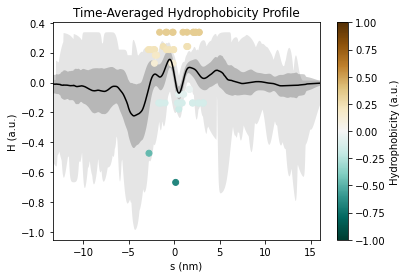

In [29]:
pl.figure("hydrophobicity_profile")

pl.plot(
	np.array(data["pathwayProfile"]["s"]),
    np.array(data["pathwayProfile"]["pfHydrophobicityMean"]),
	"k-")

pl.fill_between(
	np.array(data["pathwayProfile"]["s"]),
	np.array(data["pathwayProfile"]["pfHydrophobicityMin"]),
	np.array(data["pathwayProfile"]["pfHydrophobicityMax"]),
	facecolor = "#000000",
	alpha = 0.1)

hydrophobicity_sd = np.array(data["pathwayProfile"]["pfHydrophobicitySd"])
pl.fill_between(
	np.array(data["pathwayProfile"]["s"]),
	np.array(data["pathwayProfile"]["pfHydrophobicityMean"]) - hydrophobicity_sd,
    np.array(data["pathwayProfile"]["pfHydrophobicityMean"]) + hydrophobicity_sd,
	facecolor = "#000000",
	alpha = 0.2)

pf = np.array(data["residueSummary"]["poreFacing"]["mean"]) > 0.5
pl.scatter(
	np.array(data["residueSummary"]["s"]["mean"])[pf],
	np.array(data["residueSummary"]["hydrophobicity"])[pf],
    c =	np.array(data["residueSummary"]["hydrophobicity"])[pf],
    marker = "o",
    cmap = "BrBG_r")
pl.clim(
    -max(abs(np.array(data["residueSummary"]["hydrophobicity"]))),
    max(abs(np.array(data["residueSummary"]["hydrophobicity"]))))
cbar = pl.colorbar()
cbar.ax.set_ylabel("Hydrophobicity (a.u.)")

pl.margins(x = 0)
pl.title("Time-Averaged Hydrophobicity Profile")
pl.xlabel("s (nm)")
pl.ylabel("H (a.u.)")

#pl.savefig(
    #"time_averaged_hydrophobicity_profile.png",
	#dpi = args.dpi)

#pl.close("hydrophobicity_profile")


Text(0, 0.5, 'n (nm$^{-3}$)')

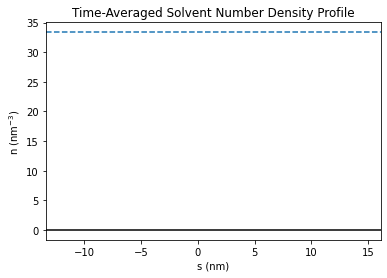

In [30]:
import json
with open('output.json') as data_file:
    data = json.load(data_file)
    
pl.figure("density_profile")

pl.axhline(
	y = 33.3679,
	linestyle = "dashed")

pl.plot(
	np.array(data["pathwayProfile"]["s"]),
    np.array(data["pathwayProfile"]["densityMean"]),
	"k-")

pl.fill_between(
	np.array(data["pathwayProfile"]["s"]),
	np.array(data["pathwayProfile"]["densityMin"]),
	np.array(data["pathwayProfile"]["densityMax"]),
	facecolor = "#000000",
	alpha = 0.1)

density_sd = np.array(data["pathwayProfile"]["densitySd"])
pl.fill_between(
	np.array(data["pathwayProfile"]["s"]),
	np.array(data["pathwayProfile"]["densityMean"]) - density_sd,
    np.array(data["pathwayProfile"]["densityMean"]) + density_sd,
	facecolor = "#000000",
	alpha = 0.2)

pl.margins(x = 0)
pl.title("Time-Averaged Solvent Number Density Profile")
pl.xlabel("s (nm)")
pl.ylabel("n (nm$^{-3}$)")

#pl.savefig(
    #"time_averaged_solvent_number_density_profile.png",
	#dpi = args.dpi)

#pl.close("density_profile")

Text(0, 0.5, 'G (kT)')

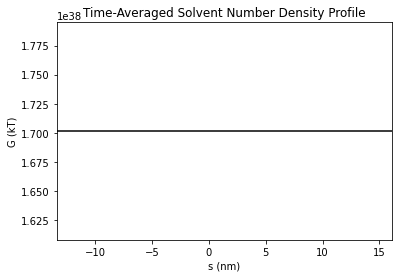

In [31]:
import json
with open('output.json') as data_file:
    data = json.load(data_file)

pl.figure("energy_profile")

pl.plot(
	np.array(data["pathwayProfile"]["s"]),
    np.array(data["pathwayProfile"]["energyMean"]),
	"k-")

energy_sd = np.array(data["pathwayProfile"]["energySd"])
pl.fill_between(
	np.array(data["pathwayProfile"]["s"]),
	np.array(data["pathwayProfile"]["energyMean"]) - energy_sd,
    np.array(data["pathwayProfile"]["energyMean"]) + energy_sd,
	facecolor = "#000000",
	alpha = 0.2)

pl.margins(x = 0)
pl.title("Time-Averaged Solvent Number Density Profile")
pl.xlabel("s (nm)")
pl.ylabel("G (kT)")

#pl.savefig(
    #"time_averaged_free_energy_profile.png",
	#dpi = args.dpi)

#pl.close("energy_profile")

In [32]:
import mdtraj as md
import matplotlib.pyplot as plt
import numpy as np

In [33]:
traj = md.load('step7_production.dcd', top='step5_input.pdb')

In [34]:
protein_sel = traj.topology.select('protein')
protein_traj = traj.atom_slice(protein_sel)
protein_sel1 = traj.topology.select('protein and segname PROA')
protein_traj1 = traj.atom_slice(protein_sel1)
protein_sel2 = traj.topology.select('protein and segname PROB')
protein_traj2 = traj.atom_slice(protein_sel2)

In [35]:
Global_RMSD = md.rmsd(protein_traj, protein_traj, 0)
EnvZ_Monomer_A = md.rmsd(protein_traj1, protein_traj1, 0)
EnvZ_Monomer_B = md.rmsd(protein_traj2, protein_traj2, 0)
              

Text(0, 0.5, 'RMSD (nm)')

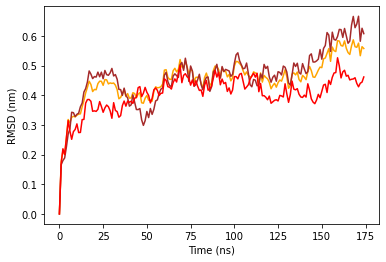

In [36]:
fig1= plt.plot(Global_RMSD, color='orange')
plt.plot(EnvZ_Monomer_A, color='brown')
plt.plot(EnvZ_Monomer_B, color='red')

plt.xlabel('Time (ns)')
plt.ylabel('RMSD (nm)')

In [37]:
protein_sel1 = traj.topology.select('protein and segname PROA')
protein_traj1 = traj.atom_slice(protein_sel1)
protein_sel2 = traj.topology.select('protein and segname PROB')
protein_traj2 = traj.atom_slice(protein_sel2)

In [38]:
rmsf = md.rmsf(protein_traj1, protein_traj1, 0)
(protein_traj2, protein_traj2, 0)

(<mdtraj.Trajectory with 175 frames, 7121 atoms, 450 residues, and unitcells at 0x7f72962e7eb0>,
 <mdtraj.Trajectory with 175 frames, 7121 atoms, 450 residues, and unitcells at 0x7f72962e7eb0>,
 0)

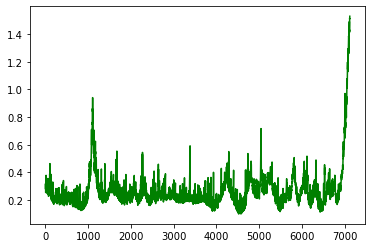

In [39]:
plt.plot(rmsf, color='green')

In [40]:
protein_sel2 = traj.topology.select('protein and name CA and segname PROA')
protein_traj2 = traj.atom_slice(protein_sel2)
protein_sel3 = traj.topology.select('protein and name CA and segname PROB')
protein_traj3 = traj.atom_slice(protein_sel3)

In [41]:
rmsf1 = md.rmsf(protein_traj2, protein_traj2, 0) 
rmsf2 = md.rmsf(protein_traj3, protein_traj3, 0)

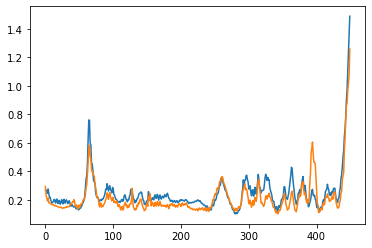

In [42]:
fig2=plt.plot(rmsf1), plt.plot(rmsf2)


plt.xlabel = 'Residue'
plt.ylabel = 'values'


plt.show()


In [43]:
import MDAnalysis as mda
from MDAnalysis.analysis import diffusionmap, align
#import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [44]:
u = mda.Universe("step5_input.psf", "step7_production.dcd")

In [45]:
aligner = align.AlignTraj(u, u, select='name CA', in_memory=True).run()

In [46]:
matrix = diffusionmap.DistanceMatrix(u, select='name CA').run()
matrix.dist_matrix.shape

/home/george/anaconda3/lib/python3.9/site-packages/MDAnalysis/analysis/diffusionmap.py:288: DeprecationWarning: The `dist_matrix` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.dist_matrix` instead.
  warnings.warn(wmsg, DeprecationWarning)


(175, 175)

TypeError: 'str' object is not callable

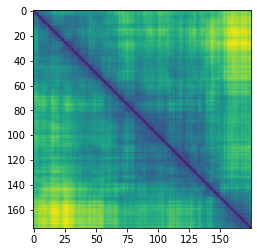

In [47]:
pl.imshow(matrix.dist_matrix, cmap='viridis')
pl.xlabel('Frame' , fontsize=10)
pl.ylabel('Frame' , fontsize=10)
pl.colorbar(label='RMSD')
ax = plt.gca()
ax.tick_params(axis = 'both' , labelsize = 10)
pl.title('Envz')

TypeError: 'str' object is not callable

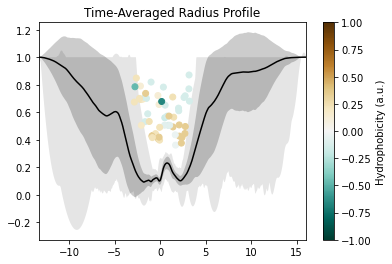

In [48]:
pl.figure("radius_profile")

pl.plot(
	np.array(data["pathwayProfile"]["s"]),
    np.array(data["pathwayProfile"]["radiusMean"]),
	"k-")

pl.fill_between(
	np.array(data["pathwayProfile"]["s"]),
	np.array(data["pathwayProfile"]["radiusMin"]),
	np.array(data["pathwayProfile"]["radiusMax"]),
	facecolor = "#000000",
	alpha = 0.1)

radius_sd = np.array(data["pathwayProfile"]["radiusSd"])
pl.fill_between(
	np.array(data["pathwayProfile"]["s"]),
	np.array(data["pathwayProfile"]["radiusMean"]) - radius_sd,
    np.array(data["pathwayProfile"]["radiusMean"]) + radius_sd,
	facecolor = "#000000",
	alpha = 0.2)

pf = np.array(data["residueSummary"]["poreFacing"]["mean"]) > 0.5
pl.scatter(
	np.array(data["residueSummary"]["s"]["mean"])[pf],
	np.array(data["residueSummary"]["rho"]["mean"])[pf],
    c =	np.array(data["residueSummary"]["hydrophobicity"])[pf],
    marker = "o",
    cmap = "BrBG_r")
pl.clim(
    -max(abs(np.array(data["residueSummary"]["hydrophobicity"]))),
    max(abs(np.array(data["residueSummary"]["hydrophobicity"]))))
cbar = pl.colorbar()
cbar.ax.set_ylabel("Hydrophobicity (a.u.)")

pl.margins(x = 0)
pl.title("Time-Averaged Radius Profile")
pl.xlabel("s (nm)")
pl.ylabel("R (nm)")

pl.savefig(
    "time_averaged_radius_profile.png",
	dpi = args.dpi)

pl.close("radius_profile")

TypeError: 'str' object is not callable

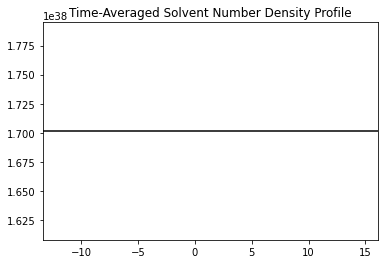

In [49]:
pl.figure("energy_profile")

pl.plot(
	np.array(data["pathwayProfile"]["s"]),
    np.array(data["pathwayProfile"]["energyMean"]),
	"k-")

energy_sd = np.array(data["pathwayProfile"]["energySd"])
pl.fill_between(
	np.array(data["pathwayProfile"]["s"]),
	np.array(data["pathwayProfile"]["energyMean"]) - energy_sd,
    np.array(data["pathwayProfile"]["energyMean"]) + energy_sd,
	facecolor = "#000000",
	alpha = 0.2)

pl.margins(x = 0)
pl.title("Time-Averaged Solvent Number Density Profile")
pl.xlabel("s (nm)")
pl.ylabel("G (kT)")

pl.savefig(
    "time_averaged_free_energy_profile.png",
	dpi = args.dpi)

pl.close("energy_profile")

TypeError: 'str' object is not callable

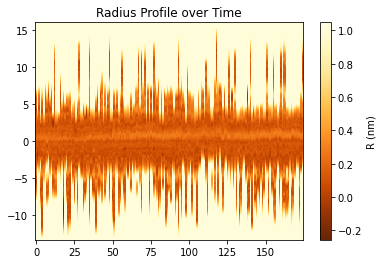

In [50]:
pl.figure("radius_profile")

s = np.array(data["pathwayProfileTimeSeries"]["s"])
t = np.array(data["pathwayProfileTimeSeries"]["t"])
r = np.array(data["pathwayProfileTimeSeries"]["radius"])

num_t = np.size(np.unique(t))
num_s = np.size(np.unique(s))

S = s.reshape(num_t, num_s)
T = t.reshape(num_t, num_s)
R = r.reshape(num_t, num_s)

pl.pcolormesh(
    T,
    S,
    R,
    cmap = "YlOrBr_r")

cbar = pl.colorbar()
cbar.ax.set_ylabel("R (nm)")

pl.title("Radius Profile over Time")
pl.xlabel("t (ps)")
pl.ylabel("s (nm)")

pl.savefig(
    "time_series_radius_profile.png",
	dpi = args.dpi)

pl.close("radius_profile")

TypeError: 'str' object is not callable

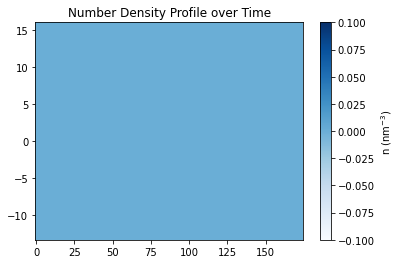

In [51]:
pl.figure("density_profile")

s = np.array(data["pathwayProfileTimeSeries"]["s"])
t = np.array(data["pathwayProfileTimeSeries"]["t"])
n = np.array(data["pathwayProfileTimeSeries"]["density"])

num_t = np.size(np.unique(t))
num_s = np.size(np.unique(s))

S = s.reshape(num_t, num_s)
T = t.reshape(num_t, num_s)
N = n.reshape(num_t, num_s)

pl.pcolormesh(
    T,
    S,
    N,
    cmap = "Blues")

cbar = pl.colorbar()
cbar.ax.set_ylabel("n ($\mathrm{nm}^{-3}$)")

pl.title("Number Density Profile over Time")
pl.xlabel("t (ps)")
pl.ylabel("s (nm)")

pl.savefig(
    "time_series_number_density_profile.png",
	dpi = args.dpi)

pl.close("density_profile")


TypeError: 'str' object is not callable

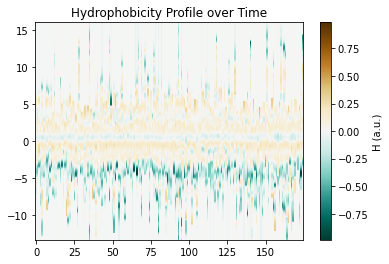

In [52]:
pl.figure("pf_hydrophobicity_profile")

s = np.array(data["pathwayProfileTimeSeries"]["s"])
t = np.array(data["pathwayProfileTimeSeries"]["t"])
h = np.array(data["pathwayProfileTimeSeries"]["pfHydrophobicity"])

num_t = np.size(np.unique(t))
num_s = np.size(np.unique(s))

S = s.reshape(num_t, num_s)
T = t.reshape(num_t, num_s)
H = h.reshape(num_t, num_s)

pl.pcolormesh(
    T,
    S,
    H,
    cmap = "BrBG_r")
pl.clim(
    -max(abs(np.array(data["pathwayProfileTimeSeries"]["pfHydrophobicity"]))),
    max(abs(np.array(data["pathwayProfileTimeSeries"]["pfHydrophobicity"]))))

cbar = pl.colorbar()
cbar.ax.set_ylabel("H (a.u.)")

pl.title("Hydrophobicity Profile over Time")
pl.xlabel("t (ps)")
pl.ylabel("s (nm)")

pl.savefig(
    "time_series_hydrophobicity_profile.png",
	dpi = args.dpi)

pl.close("pf_hydrophobicity_profile")

TypeError: 'str' object is not callable

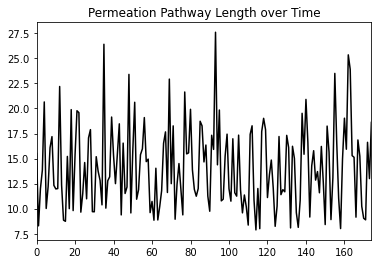

In [53]:
pl.figure("length")

pl.plot(
	np.array(data["pathwayScalarTimeSeries"]["t"]),
    np.array(data["pathwayScalarTimeSeries"]["length"]),
	"k-")

pl.margins(x = 0)
pl.title("Permeation Pathway Length over Time")
pl.xlabel("t (ps)")
pl.ylabel("L (nm)")

pl.savefig(
    "time_series_pathway_length.png",
	dpi = args.dpi)

pl.close("length")

TypeError: 'str' object is not callable

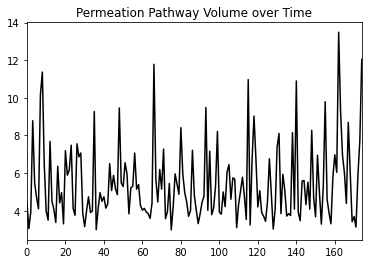

In [54]:
pl.figure("volume")

pl.plot(
	np.array(data["pathwayScalarTimeSeries"]["t"]),
    np.array(data["pathwayScalarTimeSeries"]["volume"]),
	"k-")

pl.margins(x = 0)
pl.title("Permeation Pathway Volume over Time")
pl.xlabel("t (ps)")
pl.ylabel(r"V $\left(\mathrm{nm}^3\right)$")

pl.savefig(
    "time_series_pathway_volume.png",
	dpi = args.dpi)

pl.close("volume")

TypeError: 'str' object is not callable

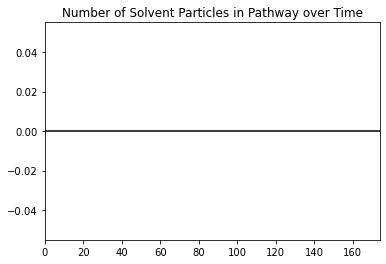

In [55]:
pl.figure("number")

pl.plot(
	np.array(data["pathwayScalarTimeSeries"]["t"]),
    np.array(data["pathwayScalarTimeSeries"]["numPathway"]),
	"k-")

pl.margins(x = 0)
pl.title("Number of Solvent Particles in Pathway over Time")
pl.xlabel("t (ps)")
pl.ylabel(r"N")

pl.savefig(
    "time_series_solvent_number_in_pathway.png",
	dpi = args.dpi)

pl.close("number")

TypeError: 'str' object is not callable

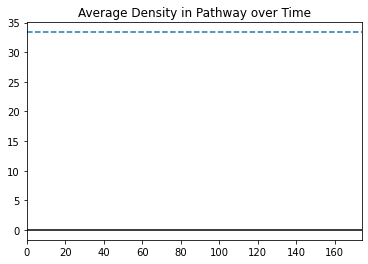

In [56]:
pl.figure("density")

pl.axhline(
	y = 33.3679,
	linestyle = "dashed")

density = np.array(data["pathwayScalarTimeSeries"]["numPathway"]) / np.array(data["pathwayScalarTimeSeries"]["volume"])
pl.plot(
	np.array(data["pathwayScalarTimeSeries"]["t"]),
    density,
	"k-")

pl.margins(x = 0)
pl.title("Average Density in Pathway over Time")
pl.xlabel("t (ps)")
pl.ylabel(r"N/V $(\mathrm{nm}^{-3})$")

pl.savefig(
    "time_series_avg_solvent_number_density.png",
	dpi = args.dpi)

pl.close("density")

TypeError: 'str' object is not callable

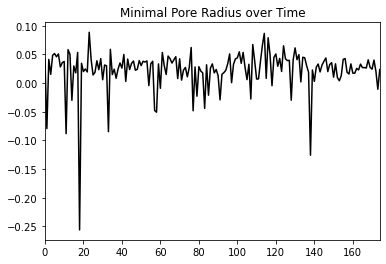

In [57]:
pl.figure("min_radius")

pl.plot(
	np.array(data["pathwayScalarTimeSeries"]["t"]),
	np.array(data["pathwayScalarTimeSeries"]["minRadius"]),
	"k-")

pl.margins(x = 0)
pl.title("Minimal Pore Radius over Time")
pl.xlabel("t (ps)")
pl.ylabel(r"$\min_s$ R $(\mathrm{nm})$")

pl.savefig(
    "time_series_min_pore_radius.png",
	dpi = args.dpi)

pl.close("min_radius")